Starting load test for 10 seconds...
Request 1: 81.55ms
Request 2: 54.09ms
Request 3: 69.49ms
Request 4: 64.40ms
Request 5: 67.24ms
Request 6: 60.69ms
Request 3: 69.49ms
Request 4: 64.40ms
Request 5: 67.24ms
Request 6: 60.69ms
Request 7: 64.16ms
Request 8: 72.29ms
Request 9: 70.21ms
Request 7: 64.16ms
Request 8: 72.29ms
Request 9: 70.21ms
Request 10: 66.28ms
Request 11: 68.81ms
Request 12: 73.01ms
Request 10: 66.28ms
Request 11: 68.81ms
Request 12: 73.01ms
Request 13: 83.67ms
Request 14: 73.71ms
Request 15: 67.71ms
Request 13: 83.67ms
Request 14: 73.71ms
Request 15: 67.71ms
Request 16: 65.62ms
Request 17: 83.43ms
Request 18: 72.03ms
Request 16: 65.62ms
Request 17: 83.43ms
Request 18: 72.03ms
Request 19: 66.72ms
Request 20: 61.54ms
Request 21: 72.74ms
Request 19: 66.72ms
Request 20: 61.54ms
Request 21: 72.74ms
Request 22: 68.75ms
Request 23: 62.97ms
Request 24: 64.57ms
Request 25: 65.44ms
Request 22: 68.75ms
Request 23: 62.97ms
Request 24: 64.57ms
Request 25: 65.44ms
Request 26: 68.97ms

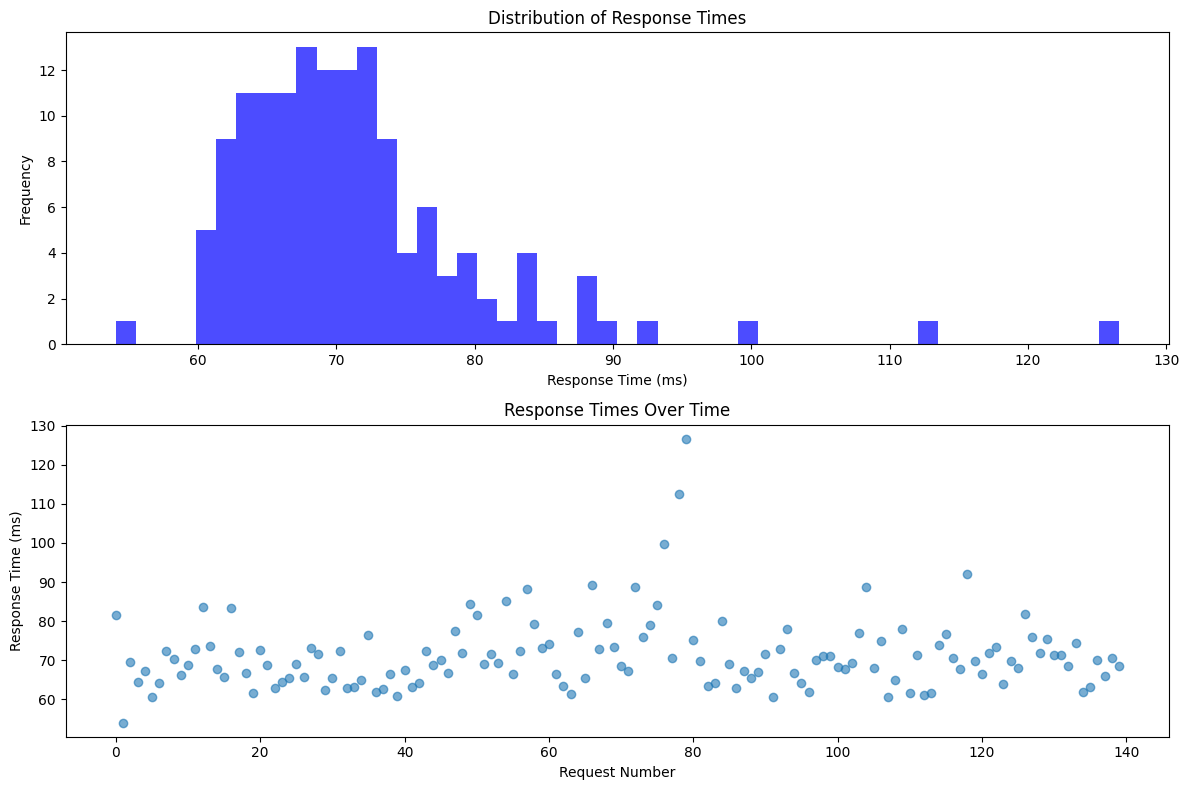


Statistics:
Total requests: 140
Average response time: 71.30ms
Median response time: 69.61ms
95th percentile: 88.24ms
99th percentile: 107.58ms
Max response time: 126.57ms


In [2]:
# Import required libraries
import requests
import time
import matplotlib.pyplot as plt
import numpy as np

# Configuration
EC2_URL = "http://35.88.188.73:8080/albums"

def load_test(url, duration_seconds=30):
    response_times = []
    start_time = time.time()
    end_time = start_time + duration_seconds
    
    print(f"Starting load test for {duration_seconds} seconds...")
    
    while time.time() < end_time:
        try:
            start_request = time.time()
            response = requests.get(url, timeout=10)
            end_request = time.time()
            
            response_time = (end_request - start_request) * 1000  # Convert to milliseconds
            response_times.append(response_time)
            
            if response.status_code == 200:
                print(f"Request {len(response_times)}: {response_time:.2f}ms")
            else:
                print(f"Request {len(response_times)}: Failed with status {response.status_code}")
                
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            
    return response_times

# Run the load test
response_times = load_test(EC2_URL, duration_seconds=10)

# Plot the results
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 1, 1)
plt.hist(response_times, bins=50, alpha=0.7, color='blue')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')

# Scatter plot over time
plt.subplot(2, 1, 2)
plt.scatter(range(len(response_times)), response_times, alpha=0.6)
plt.xlabel('Request Number')
plt.ylabel('Response Time (ms)')
plt.title('Response Times Over Time')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nStatistics:")
print(f"Total requests: {len(response_times)}")
print(f"Average response time: {np.mean(response_times):.2f}ms")
print(f"Median response time: {np.median(response_times):.2f}ms")
print(f"95th percentile: {np.percentile(response_times, 95):.2f}ms")
print(f"99th percentile: {np.percentile(response_times, 99):.2f}ms")
print(f"Max response time: {max(response_times):.2f}ms")